In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
session.query(func.count(Measurement.date)).all() ##19550 ;; 2010-01-01 - 2017-08-23
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 
yr_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(yr_ago)

2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
YrAgo = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.date > yr_ago).\
    order_by(Measurement.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
yrago_df = pd.DataFrame(YrAgo, columns=['station', 'date', 'precip'])
yrago_df.head()

,station,date,precip
0,USC00519397,2016-08-24,0.08
1,USC00513117,2016-08-24,2.15
2,USC00514830,2016-08-24,2.28
3,USC00517948,2016-08-24,NaN
4,USC00519523,2016-08-24,1.22


In [14]:
# Sort the dataframe by date --- AND GET RID OF NULL (NaN) VALUES ---
yrago_df.sort_values('date', na_position='first')
yrago_df['precip'].isnull().sum().sum()    ## 208 NaNv alues; ALL in precip column
yrago_df.dropna(inplace=True)
yrago_df.head()

,station,date,precip
0,USC00519397,2016-08-24,0.08
1,USC00513117,2016-08-24,2.15
2,USC00514830,2016-08-24,2.28
4,USC00519523,2016-08-24,1.22
5,USC00519281,2016-08-24,2.15


In [15]:
yrago_df.isnull().sum().sum()

0

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# yrago_df.info()  ## 2015 rows, precip = float
yrago_df.describe()

,precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


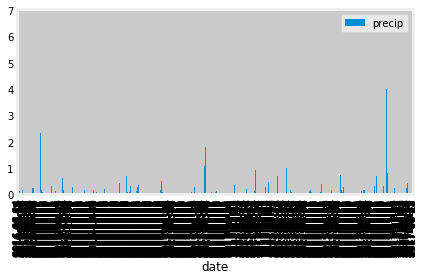

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
yrago_df.set_index('date', inplace=True)
precip_plot = yrago_df.plot.bar()
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [52]:
stations = session.query(Station.name).all()

# for station in stations:
#     sta_list += station
# print(sta_list)

In [42]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Sta_Active = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    group_by(Measurement.station).all()
Sta_Active
# session.query(Dow.date).order_by(Dow.date.desc())

[('USC00511918', '2010-01-01', 0.05),
 ('USC00513117', '2010-01-01', 0.28),
 ('USC00514830', '2010-03-01', 0.01),
 ('USC00516128', '2010-01-01', 0.14),
 ('USC00517948', '2010-05-03', None),
 ('USC00518838', '2010-01-01', 0.21),
 ('USC00519281', '2010-01-01', 0.15),
 ('USC00519397', '2010-01-01', 0.08),
 ('USC00519523', '2010-01-01', 0.15)]

In [38]:
sta_active_df = pd.DataFrame(Sta_Active, columns=['station', 'date', 'precip'])
sta_active_df.head()
sta_active_df.info()

ValueError: DataFrame constructor not properly called!

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
